In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme(color_codes = True)

In [2]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## Data Preprocessing Part 1 

In [3]:
#Check the number of unique value from all of the object datatype 
df.select_dtypes(include="object").nunique() 

Gender             2
Occupation        11
BMI Category       4
Blood Pressure    25
Sleep Disorder     2
dtype: int64

In [5]:
df.shape

(374, 13)

In [7]:
# Drop identifier column Like 'Person ID' 
df.drop(columns='Person ID', inplace=True)
df.head() 

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


### Split Blood Pressure Column into 2 column 

In [9]:
# Split the 'Blood Pressure’ column into two separate columns 
df[['Blood Pressure 1', 'Blood Pressure 2']] = df['Blood Pressure'].str.split('/', expand=True).astype(int) 
df.head() 

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure 1,Blood Pressure 2
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90


In [10]:
# Drop Blood Pressure Column 
df.drop(columns='Blood Pressure', inplace=True) 
df.head() 

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure 1,Blood Pressure 2
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,NaN,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


### Check BMI Category Unique Value 

In [11]:
df['BMI Category'].unique() 

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [12]:
# Replace 'Normal Weight' with 'Normal' in 'BMI Category' column 
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal') 
df['BMI Category'].unique() 

array(['Overweight', 'Normal', 'Obese'], dtype=object)

### Check Occupation Unique Value 

In [13]:
df['Occupation'].unique() 

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

### Exploratory Data Analysis

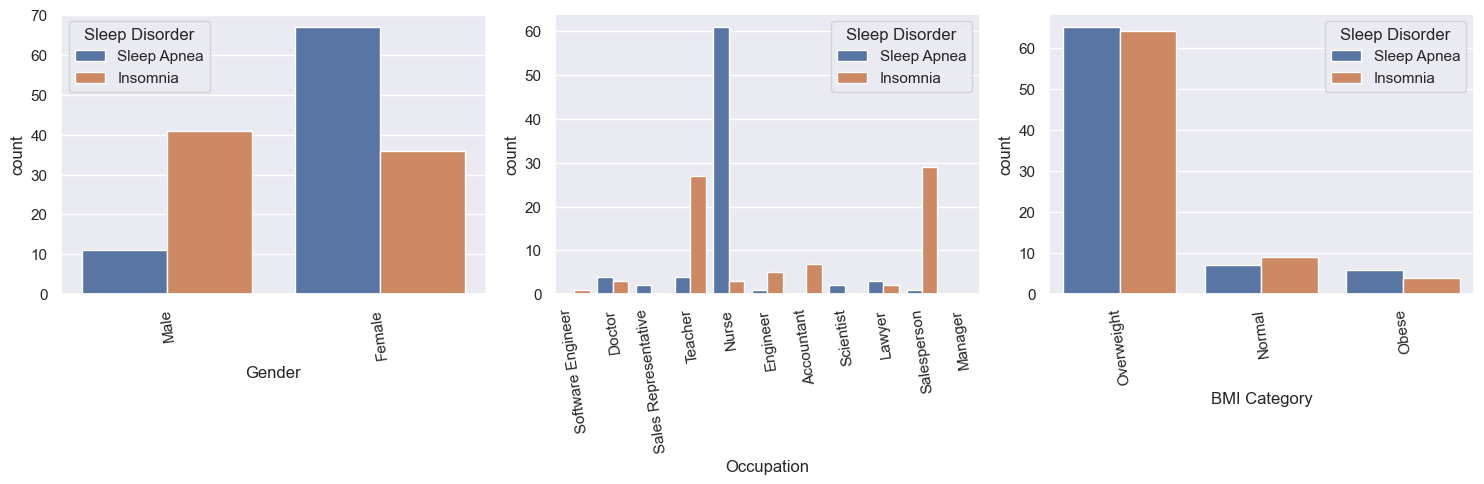

In [20]:
# List of categorical variables to plot 
cat_vars = ['Gender', 'Occupation', 'BMI Category'] 

# create figure with subplots 
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5)) 
axs = axs.flatten()

# create barplot for each categorical variable 
for i, var in enumerate(cat_vars): 
    sns.countplot (x=var, hue='Sleep Disorder', data=df, ax=axs[i]) 
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=98) 
# adjust spacing between subplots 
fig.tight_layout()
                   
# show plot 
plt.show() 

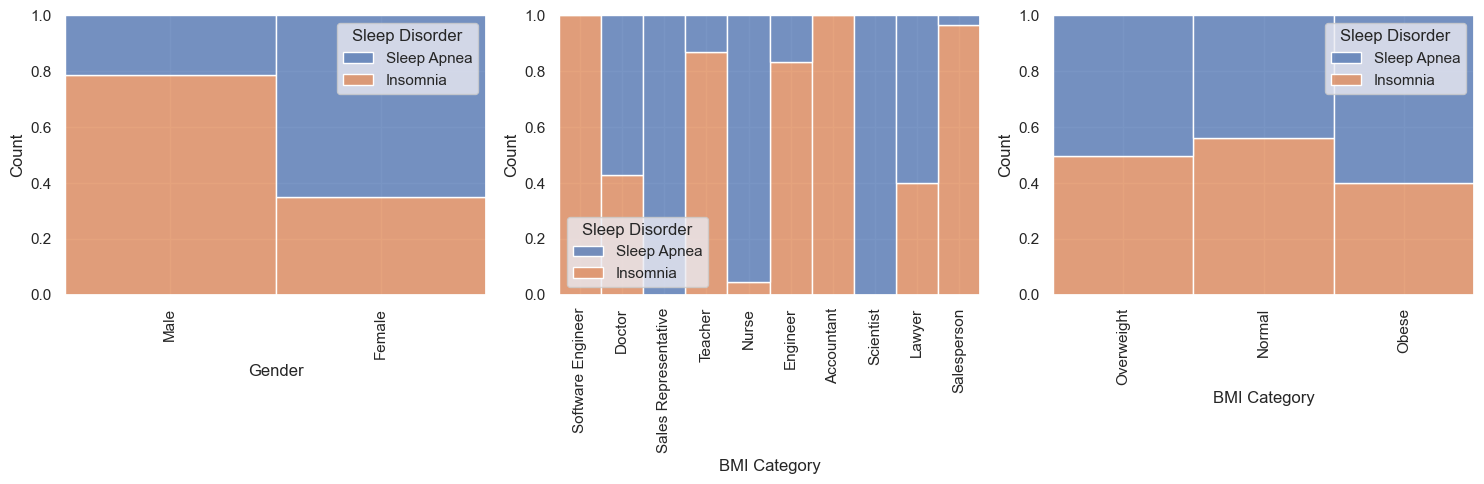

In [23]:
import warnings 
warnings.filterwarnings("ignore") 

# get List of categorical variables 
cat_vars = ['Gender', 'Occupation', 'BMI Category']

# create figure with subplots 
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5)) 
axs = axs.flatten()

# create histplot for each categorical variable 
for i, var in enumerate(cat_vars): 
    sns.histplot(x=var, hue='Sleep Disorder', data=df, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True)
    axs[i].set_xticklabels(df[var].unique(), rotation=90) 
    axs[1].set_xlabel(var) 
# adjust spacing between subplots 
fig.tight_layout()
                 
# show plot 
plt.show()

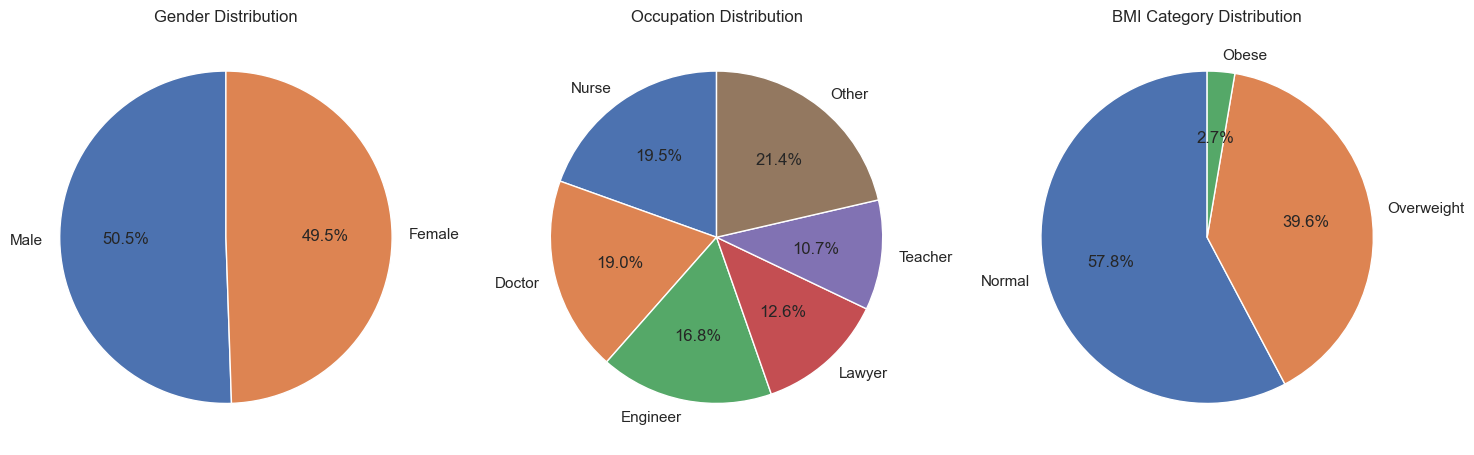

In [33]:
# Specify the maximum number of categories to show individually
max_categories = 5

cat_vars = ['Gender', 'Occupation', 'BMI Category']

# Create a figure and axes
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))

# Create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # Count the number of occurrences for each category
        cat_counts = df[var].value_counts()

        # Group categories beyond the top max_categories as ‘Other’
        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts[:max_categories]
            cat_counts_other = pd.Series([cat_counts[max_categories:].sum()], index=['Other'])
            cat_counts = pd.concat([cat_counts_top, cat_counts_other])
        
        # Create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # Set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


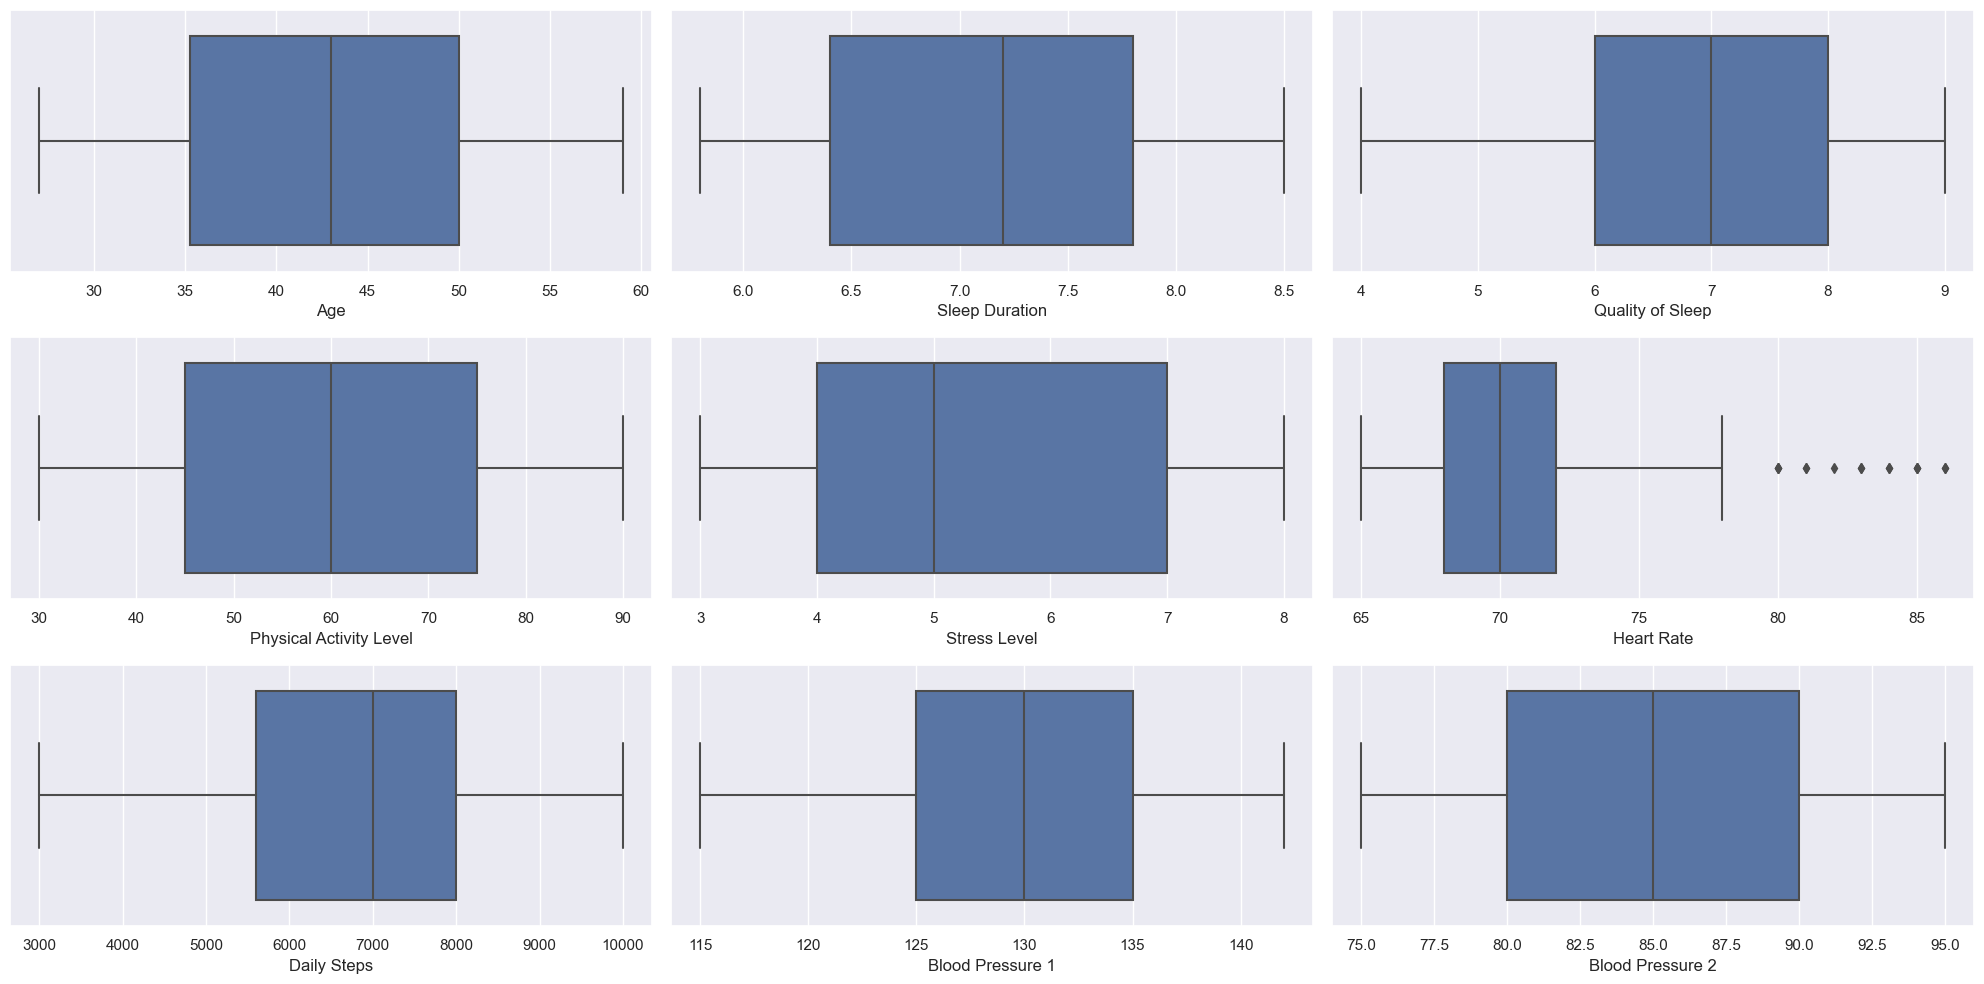

In [35]:
num_vars = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
            'Stress Level', 'Heart Rate', 'Daily Steps', 'Blood Pressure 1', 'Blood Pressure 2']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 10)) 
axs = axs.flatten() 

for i, var in enumerate(num_vars): 
    sns.boxplot (x=var, data=df, ax=axs[i])
    
fig.tight_layout() 
 
plt.show() 
